<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
specpath = glob.glob('../../data_final/SM_spectrum_50Hz.pkl')
spec = pickle.load(open(specpath[0],'rb'))
spec.keys()

dict_keys(['x', 'y', 'ymax', 'iset', 'ppump', 'xlabel', 'ylabel'])

In [4]:
devpath = glob.glob('../../data_final/SM_S11_50Hz.pkl')
dev = pickle.load(open(devpath[0],'rb'))
dev.keys()

dict_keys(['xlabel', 'ylabel', 'zlabel', 'X', 'Y', 'Z', 'vmin', 'vmax'])

In [5]:
lcpath = glob.glob('../../data_final/SM_S11_50Hz_linecuts.pkl')
lc = pickle.load(open(lcpath[0],'rb'))
lc.keys()

dict_keys(['xlabel', 'ylabel', 'x1', 'x2', 'x3', 'y1', 'y2', 'y3', 'z1', 'z2', 'z3'])

In [6]:
dpi = 1000
annsz = 8
figtextsize=10

In [7]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


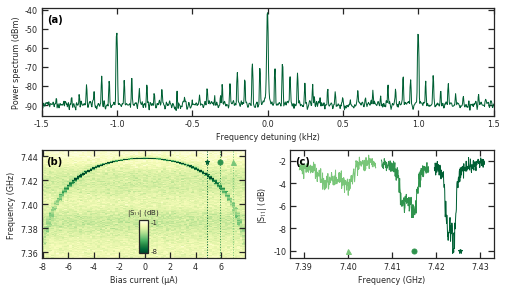

In [8]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.6,10),constrained_layout=True)
gs = fig.add_gridspec(2, 2, wspace=0.25, hspace=0.3)

axa = fig.add_subplot(gs[0,:])
plt.plot(spec['x'],spec['y'],c=cmap(0.1),lw=1)
plt.xlabel('Frequency detuning (kHz)')
plt.ylabel(spec['ylabel'])
plt.xlim(-1.5,1.5)

axb = fig.add_subplot(gs[1,0])
plt.pcolormesh(dev['X'],dev['Y'],dev['Z'],cmap=cmap,vmin=dev['vmin'],vmax=dev['vmax'],linewidth=0,rasterized=True,zorder=-1)
plt.ylabel(dev['ylabel'])
plt.xlabel(dev['xlabel'])
plt.ylim(7.355,7.445)
plt.axvline(lc['z1'],c=cmap(0.1),lw=1,ls=':')
plt.axvline(lc['z2'],c=cmap(0.3),lw=1,ls=':')
plt.axvline(lc['z3'],c=cmap(0.5),lw=1,ls=':')
plt.plot(lc['z1'],[7.435],'*',c=cmap(0.1))
plt.plot(lc['z2'],[7.435],'o',c=cmap(0.3))
plt.plot(lc['z3'],[7.435],'^',c=cmap(0.5))

axinsb = inset_axes(axb, width="4%", height="30%", loc=8) 
cbar = plt.colorbar(cax=axinsb,ticks=[-8,-1])
cbar.ax.set_title(r'|S$_{11}$| (dB)',fontsize=7)
cbar.ax.set_yticklabels(labels=[-8,-1],fontsize=7)

axc = fig.add_subplot(gs[1,1])
plt.plot(lc['x1'],lc['y1'],c=cmap(0.1),markerfacecolor='none',label=lc['z1'],lw=1)
plt.plot(lc['x2'],lc['y2'],c=cmap(0.3),markerfacecolor='none',label=lc['z2'],lw=1)
plt.plot(lc['x3'],lc['y3'],c=cmap(0.5),markerfacecolor='none',label=lc['z3'],lw=1)
plt.plot([7.4255],[-10],'*',c=cmap(0.1))
plt.plot([7.415],[-10],'o',c=cmap(0.3))
plt.plot([7.4],[-10],'^',c=cmap(0.5))
plt.xlabel(lc['xlabel'])
plt.ylabel(r'|S$_{11}$| (dB)')
# plt.legend()
    
axa.text(0.03,0.9, '(a)', fontsize=figtextsize,color='black', weight='bold', transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(0.06,0.9, '(b)', fontsize=figtextsize,color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axc.text(0.06,0.9, '(c)', fontsize=figtextsize,color='black', weight='bold', transform=axc.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('SM_50Hz_interference.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()